In [217]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import autograd.numpy as np
from autograd import grad
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
matplotlib.__version__

'3.7.2'

In [219]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('techSalaries2017.csv')

# Remove rows with NaN values
df = df.dropna()

# Convert back to NumPy array (if needed)
data = df.to_numpy()
print(data.shape)

(21589, 27)


In [221]:
# Question 1
# We first run a multiple linear regression
from sklearn.linear_model import LinearRegression
df = pd.read_csv('techSalaries2017.csv')
df = df.dropna()
# decode categorical variables into several dummy variables
df['gender_female'] = (df['gender'] == 'Female').astype(int)
df['gender_male'] = (df['gender'] == 'Male').astype(int)
df['gender_other'] = (df['gender'] == 'Other').astype(int)
df['Zodiac_1'] = (df['Zodiac'] == 1).astype(int)
df['Zodiac_2'] = (df['Zodiac'] == 2).astype(int)   
df['Zodiac_3'] = (df['Zodiac'] == 3).astype(int)
df['Zodiac_4'] = (df['Zodiac'] == 4).astype(int)
df['Zodiac_5'] = (df['Zodiac'] == 5).astype(int)
df['Zodiac_6'] = (df['Zodiac'] == 6).astype(int)
df['Zodiac_7'] = (df['Zodiac'] == 7).astype(int)
df['Zodiac_8'] = (df['Zodiac'] == 8).astype(int)
df['Zodiac_9'] = (df['Zodiac'] == 9).astype(int)
df['Zodiac_10'] = (df['Zodiac'] == 10).astype(int)
df['Zodiac_11'] = (df['Zodiac'] == 11).astype(int)
df['Zodiac_12'] = (df['Zodiac'] == 12).astype(int)
# drop useless columns
df = df.drop(columns=['basesalary', 'stockgrantvalue', 'bonus','company', 'title', 'location', 'gender','Highschool','Race_Two_Or_More','Race','Education','Zodiac','gender_other','Zodiac_1'])
data = df.to_numpy()

X = np.hstack((np.ones((data.shape[0],1)),data[:,1:]))
y_sub = data[:,0:1]

model = LinearRegression().fit(X,y_sub)

# We use R_square and RMSE to compare models
rSqr = model.score(X,y_sub)
print("R^2 value when putting predictors together : ", rSqr)

R^2 value when putting predictors together :  0.26696179997438974


R^2 value of yearsofexperience: 0.1621
R^2 value of yearsatcompany: 0.0282
R^2 value of Masters_Degree: 0.0097
R^2 value of Bachelors_Degree: 0.0240
R^2 value of Doctorate_Degree: 0.0197
R^2 value of Some_College: 0.0002
R^2 value of Race_Asian: 0.0014
R^2 value of Race_White: 0.0022
R^2 value of Race_Black: 0.0005
R^2 value of Race_Hispanic: 0.0001
R^2 value of Age: 0.0647
R^2 value of Height: 0.0001
R^2 value of SAT: 0.1107
R^2 value of GPA: 0.0933
R^2 value of gender_female: 0.0015
R^2 value of gender_male: 0.0013
R^2 value of Zodiac_2: 0.0000
R^2 value of Zodiac_3: 0.0000
R^2 value of Zodiac_4: 0.0000
R^2 value of Zodiac_5: 0.0000
R^2 value of Zodiac_6: 0.0000
R^2 value of Zodiac_7: 0.0001
R^2 value of Zodiac_8: 0.0001
R^2 value of Zodiac_9: 0.0000
R^2 value of Zodiac_10: 0.0002
R^2 value of Zodiac_11: 0.0001
R^2 value of Zodiac_12: 0.0003


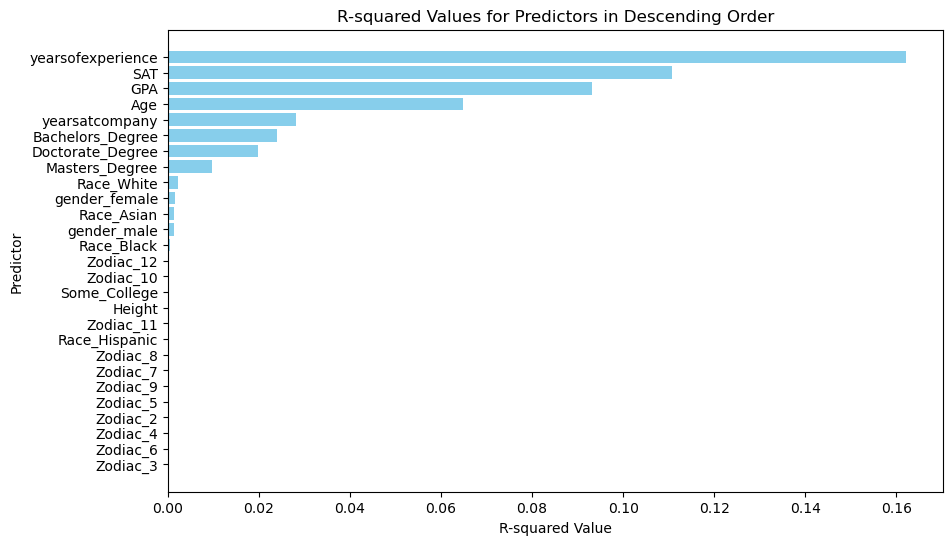

In [189]:
# Question 1
# We run a simple linear regression on each single predictor included in the full regression model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize arrays
R_square = []
RMSE = []
header = df.columns
predict_names = header[1:]
X = X[:,1:]

# Store R^2 and RMSE values
for ii in range(X.shape[1]):
    X_sub = X[:, ii:ii + 1]
    y_sub = data[:, 0:1]
    
    model = LinearRegression().fit(X_sub, y_sub)
    
    # Compute R^2 and RMSE
    rSqr = model.score(X_sub, y_sub)
    rmse = mean_squared_error(y_sub, model.predict(X_sub), squared=False)

    # Append results
    R_square.append((predict_names[ii], rSqr))
    RMSE.append((predict_names[ii], rmse))

# Convert to DataFrame
r2_df = pd.DataFrame(R_square, columns=['Predictor', 'R_squared'])
r2_df = r2_df.sort_values(by='R_squared', ascending=False)  # Sort in descending order

# Print results
for predictor, r2 in R_square:
    print(f'R^2 value of {predictor}: {r2:.4f}')

# Visualization of R^2 values
plt.figure(figsize=(10, 6))
plt.barh(r2_df['Predictor'], r2_df['R_squared'], color='skyblue')
plt.xlabel('R-squared Value')
plt.ylabel('Predictor')
plt.title('R-squared Values for Predictors in Descending Order')
plt.gca().invert_yaxis()  # Highest R^2 at the top
plt.show()

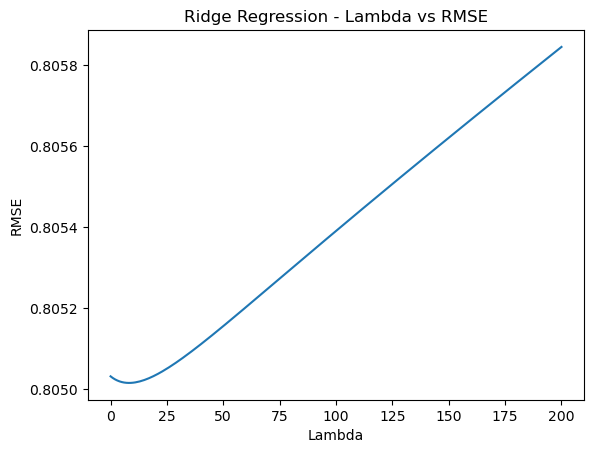

Optimal lambda: 8.00096
Smallest RMSE: 0.8050147819368771
R^2 value of full Ridge regression: 0.3031130304767743


In [199]:
# Question 2
# pick the optimal lambda of Ridge regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
df = pd.read_csv('techSalaries2017.csv')
df = df.dropna()
df['gender_female'] = (df['gender'] == 'Female').astype(int)
df['gender_male'] = (df['gender'] == 'Male').astype(int)
df['gender_other'] = (df['gender'] == 'Other').astype(int)
df['Zodiac_1'] = (df['Zodiac'] == 1).astype(int)
df['Zodiac_2'] = (df['Zodiac'] == 2).astype(int)   
df['Zodiac_3'] = (df['Zodiac'] == 3).astype(int)
df['Zodiac_4'] = (df['Zodiac'] == 4).astype(int)
df['Zodiac_5'] = (df['Zodiac'] == 5).astype(int)
df['Zodiac_6'] = (df['Zodiac'] == 6).astype(int)
df['Zodiac_7'] = (df['Zodiac'] == 7).astype(int)
df['Zodiac_8'] = (df['Zodiac'] == 8).astype(int)
df['Zodiac_9'] = (df['Zodiac'] == 9).astype(int)
df['Zodiac_10'] = (df['Zodiac'] == 10).astype(int)
df['Zodiac_11'] = (df['Zodiac'] == 11).astype(int)
df['Zodiac_12'] = (df['Zodiac'] == 12).astype(int)
df = df.drop(columns=['basesalary', 'stockgrantvalue', 'bonus','company', 'title', 'location', 'gender','Highschool','Race_Two_Or_More','Race','Education','Zodiac','gender_other','Zodiac_1'])
data = df.to_numpy()
X = np.hstack((data[:, 1:3], data[:, 11:15]))  # Feature selection
y_sub = data[:, 0:1]

# normalize continuous variables and concentacate with dummy variables
x_norm = np.hstack(((X - np.mean(X, axis=0))/np.std(X, axis=0),data[:,3:11],data[:,-13:]))
y_norm = (y_sub - np.mean(y_sub, axis=0))/np.std(y_sub, axis=0)

# split the dataset
xTrain, xTest, yTrain, yTest = train_test_split(x_norm, y_norm, test_size=0.2, random_state=0)

# Define a range of lambda values
lambdas = np.linspace(0.001,200,201)
cont = np.empty([len(lambdas), 2]) * np.NaN  # Store lambda and corresponding RMSE

# Train Ridge Regression for each lambda and compute RMSE
for ii in range(len(lambdas)):
    ridgeModel = Ridge(alpha=lambdas[ii]).fit(xTrain, yTrain)
    cont[ii, 0] = lambdas[ii]  # Store lambda value
    cont[ii, 1] = mean_squared_error(yTest, ridgeModel.predict(xTest), squared=False)  # RMSE

# Plot RMSE vs Lambda
plt.figure()
plt.plot(cont[:, 0], cont[:, 1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Ridge Regression - Lambda vs RMSE')
plt.show()

# Find the optimal lambda (smallest RMSE)
model = Ridge(alpha=lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))]).fit(xTrain, yTrain)
rSqr = model.score(xTest, yTest)
print('Optimal lambda:',lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))])
print('Smallest RMSE:',cont[np.argmin(cont[:, 1]), 1])
print(f'R^2 value of full Ridge regression: {rSqr}')

In [201]:
# Question 2
# Run on single predictors with Ridge regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
df = pd.read_csv('techSalaries2017.csv')
df = df.dropna()
df['gender_female'] = (df['gender'] == 'Female').astype(int)
df['gender_male'] = (df['gender'] == 'Male').astype(int)
df['gender_other'] = (df['gender'] == 'Other').astype(int)
df['Zodiac_1'] = (df['Zodiac'] == 1).astype(int)
df['Zodiac_2'] = (df['Zodiac'] == 2).astype(int)   
df['Zodiac_3'] = (df['Zodiac'] == 3).astype(int)
df['Zodiac_4'] = (df['Zodiac'] == 4).astype(int)
df['Zodiac_5'] = (df['Zodiac'] == 5).astype(int)
df['Zodiac_6'] = (df['Zodiac'] == 6).astype(int)
df['Zodiac_7'] = (df['Zodiac'] == 7).astype(int)
df['Zodiac_8'] = (df['Zodiac'] == 8).astype(int)
df['Zodiac_9'] = (df['Zodiac'] == 9).astype(int)
df['Zodiac_10'] = (df['Zodiac'] == 10).astype(int)
df['Zodiac_11'] = (df['Zodiac'] == 11).astype(int)
df['Zodiac_12'] = (df['Zodiac'] == 12).astype(int)
df = df.drop(columns=['basesalary', 'stockgrantvalue', 'bonus','company', 'title', 'location', 'gender','Highschool','Race_Two_Or_More','Race','Education','Zodiac','gender_other','Zodiac_1'])
data = df.to_numpy()
X = np.hstack((data[:, 1:3], data[:, 11:15]))  # Continuous features
y_sub = data[:, 0:1]

# Normalize continuous features
x_cont_norm = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
x_dummy = np.hstack((data[:, 3:11], data[:, -13:]))  # Dummy variables (not normalized)

# Combine features
x_norm = np.hstack((x_cont_norm, x_dummy))
y_norm = (y_sub - np.mean(y_sub, axis=0)) / np.std(y_sub, axis=0)

# Split data into training and test sets
xTrain, xTest, yTrain, yTest = train_test_split(x_norm, y_norm, test_size=0.2, random_state=0)

# Set fixed lambda value
lambda_value = 0.001  # You can change this as needed

# Run regression for each single predictor
num_features = x_norm.shape[1]
results = []
columns = ['yearsofexperience','yearsatcompany','Age','Height','SAT','GPA','Masters_Degree','Bachelors_Degree',
           'Doctorate_Degree','Some_College','Race_Asian','Race_White','Race_Black','Race_Hispanic','gender_female','gender_male','Zodiac_2',
           'Zodiac_3','Zodiac_4','Zodiac_5','Zodiac_6','Zodiac_7','Zodiac_8','Zodiac_9','Zodiac_10','Zodiac_11','Zodiac_12']

for i in range(num_features):
    x_single = x_norm[:, i].reshape(-1, 1)  # Select one feature at a time

    xTrain_single, xTest_single, _, _ = train_test_split(x_single, y_norm, test_size=0.2, random_state=0)

    ridge_model = Ridge(alpha = lambda_value).fit(xTrain_single, yTrain)
    rmse = mean_squared_error(yTest, ridge_model.predict(xTest_single), squared=False)
    r2 = ridge_model.score(xTest_single, yTest)

    results.append([i, rmse, r2])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Feature Index', 'RMSE', 'R^2'])

for i in range(len(results)):
    print(f'R^2 of {columns[i]}: {results[i][2]}')

R^2 of yearsofexperience: 0.18756324477173958
R^2 of yearsatcompany: 0.0402680987392775
R^2 of Age: 0.0782210720373463
R^2 of Height: -0.0013002977594533949
R^2 of SAT: 0.12902089356029633
R^2 of GPA: 0.11304879852285843
R^2 of Masters_Degree: 0.006910132650352785
R^2 of Bachelors_Degree: 0.022929912772448713
R^2 of Doctorate_Degree: 0.02134134759170858
R^2 of Some_College: 0.0002090700556742764
R^2 of Race_Asian: 0.0023763647140656596
R^2 of Race_White: 0.003247789535059775
R^2 of Race_Black: 0.000594657992076808
R^2 of Race_Hispanic: 9.086309045802654e-05
R^2 of gender_female: -2.361933257022386e-05
R^2 of gender_male: -0.0004707208757008807
R^2 of Zodiac_2: -0.00018497537036954448
R^2 of Zodiac_3: -0.0004631121098375157
R^2 of Zodiac_4: -0.0001859567561852682
R^2 of Zodiac_5: -0.00011300825376991952
R^2 of Zodiac_6: -0.0007872645816282553
R^2 of Zodiac_7: -8.040412311216549e-05
R^2 of Zodiac_8: -1.2537650081467788e-05
R^2 of Zodiac_9: -0.0001530395961355513
R^2 of Zodiac_10: 0.00022

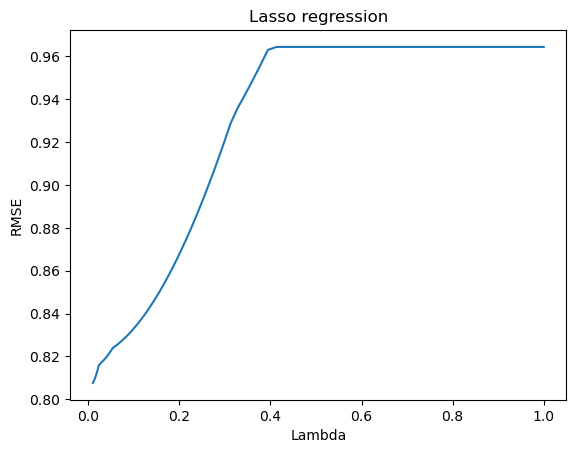

Optimal lambda: 0.01
Smallest RMSE: 0.807610820910695
R^2 value of full Lasso regression: 0.2986110936896499
Number of predictors set to zero: 21


In [203]:
# Question 3
# pick the optimal lambda of Lasso regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
df = pd.read_csv('techSalaries2017.csv')
df = df.dropna()
df['gender_female'] = (df['gender'] == 'Female').astype(int)
df['gender_male'] = (df['gender'] == 'Male').astype(int)
df['gender_other'] = (df['gender'] == 'Other').astype(int)
df['Zodiac_1'] = (df['Zodiac'] == 1).astype(int)
df['Zodiac_2'] = (df['Zodiac'] == 2).astype(int)   
df['Zodiac_3'] = (df['Zodiac'] == 3).astype(int)
df['Zodiac_4'] = (df['Zodiac'] == 4).astype(int)
df['Zodiac_5'] = (df['Zodiac'] == 5).astype(int)
df['Zodiac_6'] = (df['Zodiac'] == 6).astype(int)
df['Zodiac_7'] = (df['Zodiac'] == 7).astype(int)
df['Zodiac_8'] = (df['Zodiac'] == 8).astype(int)
df['Zodiac_9'] = (df['Zodiac'] == 9).astype(int)
df['Zodiac_10'] = (df['Zodiac'] == 10).astype(int)
df['Zodiac_11'] = (df['Zodiac'] == 11).astype(int)
df['Zodiac_12'] = (df['Zodiac'] == 12).astype(int)
df = df.drop(columns=['basesalary', 'stockgrantvalue', 'bonus','company', 'title', 'location', 'gender','Highschool','Race_Two_Or_More','Race','Education','Zodiac','gender_other','Zodiac_1'])
data = df.to_numpy()
X = np.hstack((data[:, 1:3], data[:, 11:15]))  # Feature selection
y_sub = data[:, 0:1]

x_norm = np.hstack(((X - np.mean(X, axis=0))/np.std(X, axis=0),data[:,3:11],data[:,-13:]))
y_norm = (y_sub - np.mean(y_sub, axis=0))/np.std(y_sub, axis=0)
xTrain, xTest, yTrain, yTest = train_test_split(x_norm, y_norm, test_size=0.2, random_state=0)

# Define a range of lambda values
lambdas = np.logspace(-2, 0, 100)
# Store lambda and corresponding RMSE
cont = np.empty([len(lambdas), 2]) * np.NaN

for ii in range(len(lambdas)):
    lassoModel = Lasso(alpha=lambdas[ii]).fit(xTrain, yTrain)
    cont[ii,0] = lambdas[ii]
    error = mean_squared_error(yTest,lassoModel.predict(xTest),squared=False)
    cont[ii,1] = error

plt.figure()
plt.plot(cont[:,0],cont[:,1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Lasso regression')
plt.show()
print('Optimal lambda:',lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))])
print('Smallest RMSE:',cont[np.argmin(cont[:, 1]), 1])

model = Lasso(alpha=0.01).fit(xTrain,yTrain)
rSqr = model.score(xTest, yTest)
print(f'R^2 value of full Lasso regression: {rSqr}')

# Calculate how many coefficients are shrunk to 0 
num_zero_coefs = np.sum(model.coef_ == 0)
print(f'Number of predictors set to zero: {num_zero_coefs}')

In [205]:
# Question 3
# Run on single predictors with Lasso regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
df = pd.read_csv('techSalaries2017.csv')
df = df.dropna()
df['gender_female'] = (df['gender'] == 'Female').astype(int)
df['gender_male'] = (df['gender'] == 'Male').astype(int)
df['gender_other'] = (df['gender'] == 'Other').astype(int)
df['Zodiac_1'] = (df['Zodiac'] == 1).astype(int)
df['Zodiac_2'] = (df['Zodiac'] == 2).astype(int)   
df['Zodiac_3'] = (df['Zodiac'] == 3).astype(int)
df['Zodiac_4'] = (df['Zodiac'] == 4).astype(int)
df['Zodiac_5'] = (df['Zodiac'] == 5).astype(int)
df['Zodiac_6'] = (df['Zodiac'] == 6).astype(int)
df['Zodiac_7'] = (df['Zodiac'] == 7).astype(int)
df['Zodiac_8'] = (df['Zodiac'] == 8).astype(int)
df['Zodiac_9'] = (df['Zodiac'] == 9).astype(int)
df['Zodiac_10'] = (df['Zodiac'] == 10).astype(int)
df['Zodiac_11'] = (df['Zodiac'] == 11).astype(int)
df['Zodiac_12'] = (df['Zodiac'] == 12).astype(int)
df = df.drop(columns=['basesalary', 'stockgrantvalue', 'bonus','company', 'title', 'location', 'gender','Highschool','Race_Two_Or_More','Race','Education','Zodiac','gender_other','Zodiac_1'])
data = df.to_numpy()
X = np.hstack((data[:, 1:3], data[:, 11:15]))  # Continuous features
y_sub = data[:, 0:1]

# Normalize continuous features
x_cont_norm = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
x_dummy = np.hstack((data[:, 3:11], data[:, -13:]))  # Dummy variables (not normalized)

# Combine features
x_norm = np.hstack((x_cont_norm, x_dummy))
y_norm = (y_sub - np.mean(y_sub, axis=0)) / np.std(y_sub, axis=0)

# Split data into training and test sets
xTrain, xTest, yTrain, yTest = train_test_split(x_norm, y_norm, test_size=0.2, random_state=0)

# Set fixed lambda value
lambda_value = 0.01  # You can change this as needed

# Run regression for each single predictor
num_features = x_norm.shape[1]
results = []
columns = ['yearsofexperience','yearsatcompany','Age','Height','SAT','GPA','Masters_Degree','Bachelors_Degree',
           'Doctorate_Degree','Some_College','Race_Asian','Race_White','Race_Black','Race_Hispanic','gender_female','gender_male','Zodiac_2',
           'Zodiac_3','Zodiac_4','Zodiac_5','Zodiac_6','Zodiac_7','Zodiac_8','Zodiac_9','Zodiac_10','Zodiac_11','Zodiac_12']

for i in range(num_features):
    x_single = x_norm[:, i].reshape(-1, 1)  # Select one feature at a time

    xTrain_single, xTest_single, _, _ = train_test_split(x_single, y_norm, test_size=0.2, random_state=0)

    lassoModel = Lasso(alpha = lambda_value).fit(xTrain_single, yTrain)
    rmse = mean_squared_error(yTest, lassoModel.predict(xTest_single), squared=False)
    r2 = lassoModel.score(xTest_single, yTest)

    results.append([i, rmse, r2])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Feature Index', 'RMSE', 'R^2'])

for i in range(len(results)):
    print(f'R^2 of {columns[i]}: {results[i][2]}')
# for i in range(len(results)):
#     print(f'RMSE of {columns[i]}: {results[i][1]}')

R^2 of yearsofexperience: 0.18715697133798104
R^2 of yearsatcompany: 0.03940354480517272
R^2 of Age: 0.07771504251573169
R^2 of Height: -0.0006178779220447073
R^2 of SAT: 0.12856668262792792
R^2 of GPA: 0.11245751555740147
R^2 of Masters_Degree: 0.0072908171758721
R^2 of Bachelors_Degree: 0.022921979522737224
R^2 of Doctorate_Degree: 0.01874038819295476
R^2 of Some_College: -0.0001930078347851527
R^2 of Race_Asian: 0.0011160348311209933
R^2 of Race_White: 0.0021156442244122386
R^2 of Race_Black: -0.0001930078347851527
R^2 of Race_Hispanic: -0.0001930078347851527
R^2 of gender_female: 0.0003517972936277758
R^2 of gender_male: 0.00012409328216200777
R^2 of Zodiac_2: -0.0001930078347851527
R^2 of Zodiac_3: -0.0001930078347851527
R^2 of Zodiac_4: -0.0001930078347851527
R^2 of Zodiac_5: -0.0001930078347851527
R^2 of Zodiac_6: -0.0001930078347851527
R^2 of Zodiac_7: -0.0001930078347851527
R^2 of Zodiac_8: -0.0001930078347851527
R^2 of Zodiac_9: -0.0001930078347851527
R^2 of Zodiac_10: -0.000

Intercept of full model: [-2.37026714]
Coefficient for totalyearlycompensation of full model: -0.028890914267810174
P-value for totalyearlycompensation: 0.250399
Confusion matrix of full model = 
[[3508    0]
 [ 789    0]]


Text(0.5, 1.0, 'PR Curve of full model')

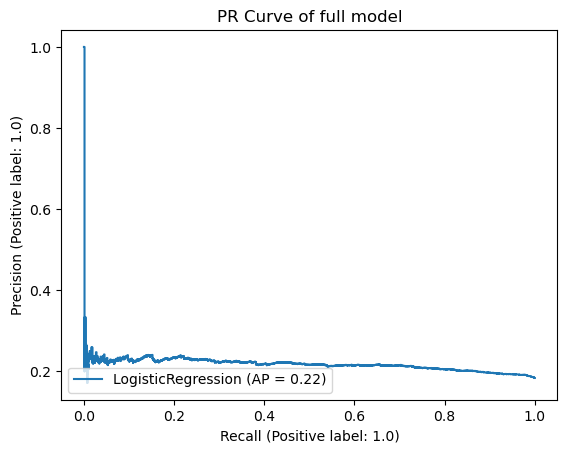

In [207]:
# Question 4
# Logistic Regression of full model, controlling other factors
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection, metrics
import matplotlib.pyplot as plt
df = pd.read_csv('techSalaries2017.csv')
df = df.dropna()
df = df.loc[df['gender'] != 'Other']
df = df.loc[df['gender'] != 'Title:Senior Software Engineer']
df['Zodiac_1'] = (df['Zodiac'] == 1).astype(int)
df['Zodiac_2'] = (df['Zodiac'] == 2).astype(int)   
df['Zodiac_3'] = (df['Zodiac'] == 3).astype(int)
df['Zodiac_4'] = (df['Zodiac'] == 4).astype(int)
df['Zodiac_5'] = (df['Zodiac'] == 5).astype(int)
df['Zodiac_6'] = (df['Zodiac'] == 6).astype(int)
df['Zodiac_7'] = (df['Zodiac'] == 7).astype(int)
df['Zodiac_8'] = (df['Zodiac'] == 8).astype(int)
df['Zodiac_9'] = (df['Zodiac'] == 9).astype(int)
df['Zodiac_10'] = (df['Zodiac'] == 10).astype(int)
df['Zodiac_11'] = (df['Zodiac'] == 11).astype(int)
df['Zodiac_12'] = (df['Zodiac'] == 12).astype(int)

# decode gender column into numeric values
df['gender_categorical'] = (df['gender'] == 'Female').astype(int)
df = df.drop(columns=['basesalary', 'stockgrantvalue', 'bonus','company', 'title', 'location', 'gender','Highschool','Race_Two_Or_More','Race','Education','Zodiac','Zodiac_1'])
data = df.to_numpy()

X = np.hstack((data[:,0:3], data[:, 11:15]))
norm_df = np.hstack(((X - np.mean(X, axis=0))/np.std(X, axis=0),data[:,3:11],data[:,-12:-1]))
gender_categorical = data[:,-1:].reshape(-1,1)
norm_df_with_gender = np.hstack((norm_df,gender_categorical))
columns = df.drop(columns=['gender_categorical']).columns.tolist() + ['gender_categorical']
new_df = pd.DataFrame(norm_df_with_gender,columns = columns)

train_data, val_data = model_selection.train_test_split(new_df, test_size = 0.2,random_state = 0)

X_train = train_data.drop('gender_categorical', axis = 1) # We drop the target from the features.
X_val  = val_data.drop('gender_categorical', axis = 1)  # Note that this does not operate inplace.
y_train = train_data['gender_categorical']
y_val  = val_data['gender_categorical']

model_all = LogisticRegression(solver = 'liblinear')
model_all.fit(X_train, y_train)
pred_all = model_all.predict(X_val)
print("Intercept of full model:", model_all.intercept_)
feature_index = X_train.columns.get_loc('totalyearlycompensation')
print("Coefficient for totalyearlycompensation of full model:", model_all.coef_[0, feature_index])

n = X_train.shape[0]
p = X_train.shape[1]

# Calculate standard errors of the coefficients
pred_probs = model_all.predict_proba(X_train)[:, 1]  # Probabilities for class 1
W = np.diagflat(pred_probs * (1 - pred_probs))  # Weight matrix
X_design = np.hstack((np.ones((n, 1)), X_train))  # Add intercept term
cov_matrix = np.linalg.inv(X_design.T @ W @ X_design)  # Covariance matrix
std_errors = np.sqrt(np.diag(cov_matrix))

# Compute z-scores and p-values
z_scores = model_all.coef_[0] / std_errors[1:]  # Exclude intercept
p_values = 2 * (1 - stats.norm.cdf(np.abs(z_scores)))  # Two-tailed p-values
# Output p-value for totalyearlycompensation
print(f"P-value for totalyearlycompensation: {p_values[feature_index]:.6f}")

# The matrix of predictions and true values for each class.
conf_matrix = metrics.confusion_matrix(y_val, pred_all)
print("Confusion matrix of full model = ")
print(conf_matrix)

metrics.PrecisionRecallDisplay.from_estimator(model_all, X_val, y_val)
plt.title('PR Curve of full model')


Intercept of simple model: [-1.51916945]
Coefficients of simple model: [[-0.09022397]]
P-value for totalyearlycompensation: 0.000052
Confusion matrix of single model = 
[[3508    0]
 [ 789    0]]


Text(0.5, 1.0, 'PR Curve of single model')

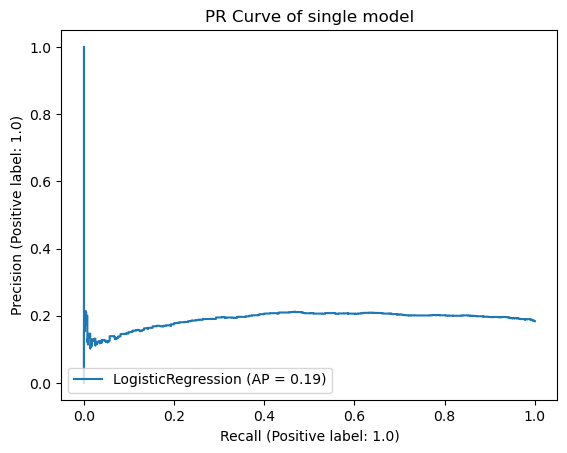

In [209]:
# Question 4
# Logistic Regression of single model
df = pd.read_csv('techSalaries2017.csv')
df = df.dropna()
df = df.loc[df['gender'] != 'Other']
df = df.loc[df['gender'] != 'Title:Senior Software Engineer']
df['Zodiac_1'] = (df['Zodiac'] == 1).astype(int)
df['Zodiac_2'] = (df['Zodiac'] == 2).astype(int)   
df['Zodiac_3'] = (df['Zodiac'] == 3).astype(int)
df['Zodiac_4'] = (df['Zodiac'] == 4).astype(int)
df['Zodiac_5'] = (df['Zodiac'] == 5).astype(int)
df['Zodiac_6'] = (df['Zodiac'] == 6).astype(int)
df['Zodiac_7'] = (df['Zodiac'] == 7).astype(int)
df['Zodiac_8'] = (df['Zodiac'] == 8).astype(int)
df['Zodiac_9'] = (df['Zodiac'] == 9).astype(int)
df['Zodiac_10'] = (df['Zodiac'] == 10).astype(int)
df['Zodiac_11'] = (df['Zodiac'] == 11).astype(int)
df['Zodiac_12'] = (df['Zodiac'] == 12).astype(int)

# decode gender column into numeric values
df['gender_categorical'] = (df['gender'] == 'Female').astype(int)
df = df.drop(columns=['basesalary', 'stockgrantvalue', 'bonus','company', 'title', 'location', 'gender','Highschool','Race_Two_Or_More','Race','Education','Zodiac','Zodiac_1'])
data = df.to_numpy()
X = np.hstack((data[:,0:3], data[:, 11:15]))
norm_df = np.hstack(((X - np.mean(X, axis=0))/np.std(X, axis=0),data[:,3:11],data[:,-12:-1]))
gender_categorical = data[:,-1:].reshape(-1,1)
norm_df_with_gender = np.hstack((norm_df,gender_categorical))
columns = df.drop(columns=['gender_categorical']).columns.tolist() + ['gender_categorical']
new_df = pd.DataFrame(norm_df_with_gender,columns = columns)

train_data, val_data = model_selection.train_test_split(new_df, test_size = 0.2,random_state = 0)

X_train = train_data.drop('gender_categorical', axis = 1) # We drop the target from the features.
X_val  = val_data.drop('gender_categorical', axis = 1)  # Note that this does not operate inplace.
y_train = train_data['gender_categorical']
y_val  = val_data['gender_categorical']

model_single = LogisticRegression(solver = 'liblinear')
model_single.fit(X_train[['totalyearlycompensation']],y_train)
# Print model coefficients
print("Intercept of simple model:", model_single.intercept_)
print("Coefficients of simple model:", model_single.coef_)

# Preparation for calculating p-values
n = X_train.shape[0]  # Number of observations
X_design = np.hstack((np.ones((n, 1)), X_train[['totalyearlycompensation']]))  # Add intercept column
pred_probs = model_single.predict_proba(X_train[['totalyearlycompensation']])[:, 1]  # Probabilities for class 1
W = np.diagflat(pred_probs * (1 - pred_probs))  # Weight matrix
cov_matrix = np.linalg.inv(X_design.T @ W @ X_design)  # Covariance matrix
std_errors = np.sqrt(np.diag(cov_matrix))  # Standard errors

# Compute z-scores and p-values
z_scores = model_single.coef_[0] / std_errors[1]  # Coefficient / standard error
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_scores)))  # Two-tailed p-value
# Output p-value for totalyearlycompensation
print(f"P-value for totalyearlycompensation: {p_value[0]:.6f}")

pred_single = model_single.predict(X_val[['totalyearlycompensation']])

# The matrix of predictions and true values for each class.
conf_matrix = metrics.confusion_matrix(y_val, pred_single)
print("Confusion matrix of single model = ")
print(conf_matrix)

metrics.PrecisionRecallDisplay.from_estimator(model_single, X_val[['totalyearlycompensation']], y_val)
plt.title('PR Curve of single model')

Predicting with yearsofexperience
Accuracy = 64.1%

Predicting with Age
Accuracy = 57.6%

Predicting with Height
Accuracy = 48.8%

Predicting with SAT
Accuracy = 60.1%

Predicting with GPA
Accuracy = 59.4%



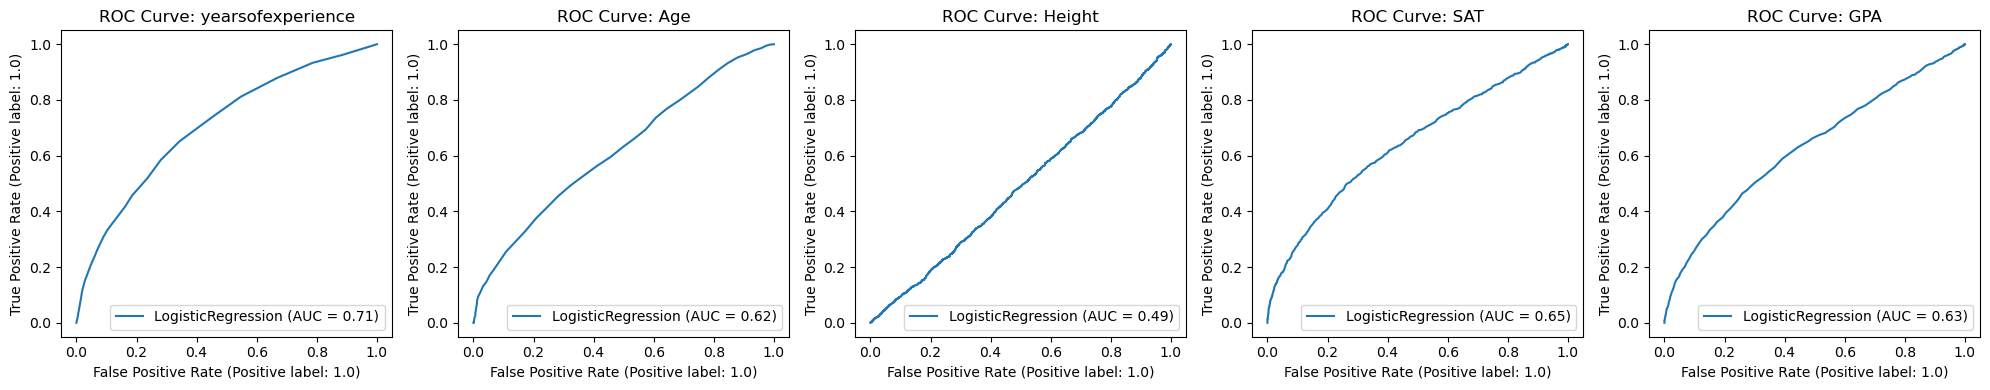

In [211]:
# Question 5
# Model with single predictors
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection, metrics

# Load dataset
df = pd.read_csv('techSalaries2017.csv')
df = df.dropna()
salary_threshold = df['totalyearlycompensation'].median()
df['highvslowearner'] = (df['totalyearlycompensation'] > salary_threshold).astype(int)

# Features to test
features = ['yearsofexperience', 'Age', 'Height', 'SAT', 'GPA']

# Set up subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # 1 row, 5 columns

for i, feature in enumerate(features):
    print(f'Predicting with {feature}')
    
    # Prepare data
    x = df[feature]
    y = df['highvslowearner']
    x_norm = ((x - x.mean()) / x.std()).to_numpy().reshape(-1, 1)
    norm_df = pd.DataFrame(np.hstack((x_norm, y.to_numpy().reshape(-1, 1))), columns=[feature, 'highvslowearner'])
    
    # Train-test split
    train_data, val_data = model_selection.train_test_split(norm_df, test_size=0.2, random_state=0)
    X_train = train_data[feature].to_numpy().reshape(-1, 1)
    X_val = val_data[feature].to_numpy().reshape(-1, 1)
    y_train = train_data['highvslowearner']
    y_val = val_data['highvslowearner']
    
    # Train logistic regression model
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    
    accuracy = metrics.accuracy_score(y_val, pred)
    print(f"Accuracy = {accuracy * 100:.1f}%")
    
    # Plot ROC curve in subplot
    metrics.RocCurveDisplay.from_estimator(model, X_val, y_val, ax=axes[i])
    axes[i].set_title(f'ROC Curve: {feature}')
    print()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

totalyearlycompensation - Skewness: 4.51, Kurtosis: 87.00
Height - Skewness: -0.00, Kurtosis: 0.00
Age - Skewness: 0.29, Kurtosis: -0.21


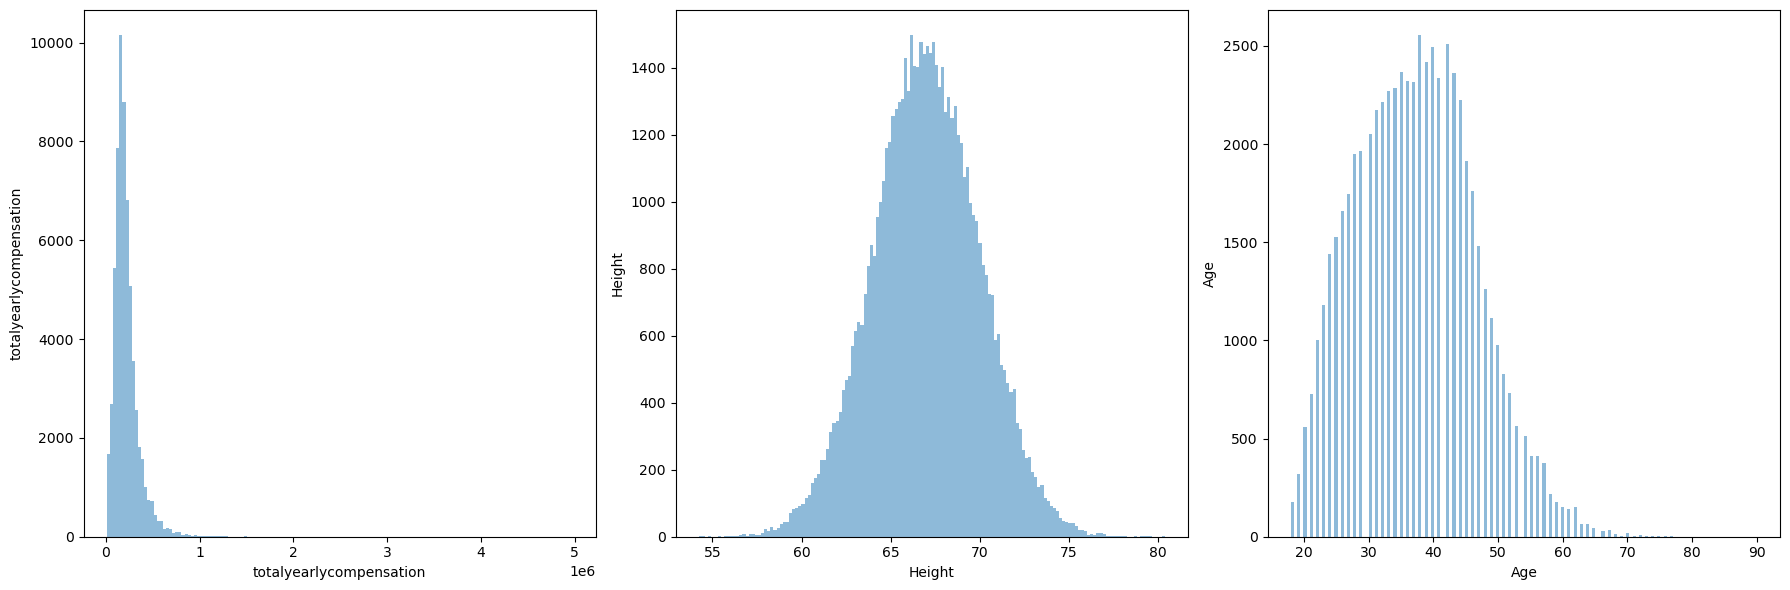

In [240]:
# Extra 1
from scipy.stats import skew, kurtosis
df = pd.read_csv('techSalaries2017.csv')
data = df.to_numpy()
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
header = df.columns

columns = {'totalyearlycompensation': 3, 'Height': -4, 'Age': -5}
skewness_values = {}
kurtosis_values = {}
for i, (feature, index) in enumerate(columns.items()):
    # Extract feature data
    feature_data = data[:, index].astype('float')

    # Plot histogram
    axes[i].hist(feature_data, bins=150, alpha=0.5)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(feature)

    # Compute skewness and kurtosis
    skewness_values[feature] = stats.skew(feature_data)
    kurtosis_values[feature] = stats.kurtosis(feature_data)

# Display skewness and kurtosis values
for feature in columns.keys():
    print(f"{feature} - Skewness: {skewness_values[feature]:.2f}, Kurtosis: {kurtosis_values[feature]:.2f}")


plt.tight_layout()

Intercept: [0.77381072]
Coefficient: [[-0.08951107 -0.02331211 -0.70822468 -0.25638323 -1.17207988 -0.05223386
   0.37673772  0.01441978 -0.19874164 -0.35658639  0.99900658]]


Text(0.5, 1.0, 'ROC Curve')

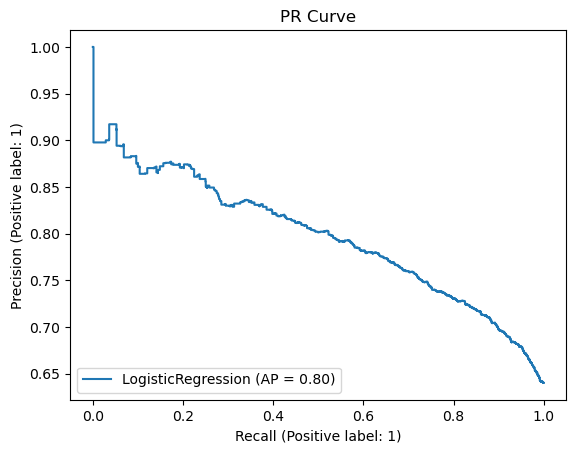

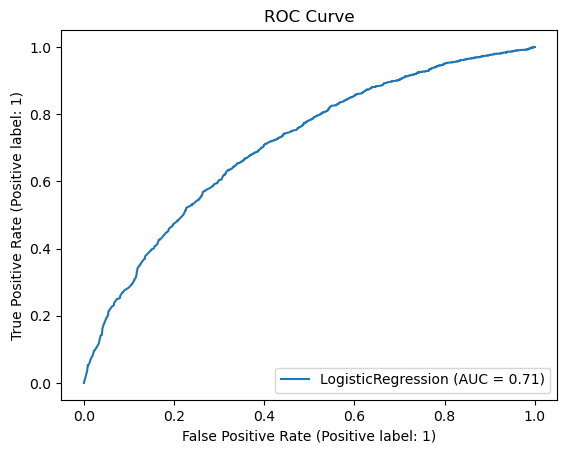

In [215]:
# Extra 2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Load dataset
df = pd.read_csv('techSalaries2017.csv')
df = df.dropna()
df = df[df['gender'] != 'Other']
df['title_software_engineer'] = (df['title'] == 'Software Engineer').astype(int)
df['gender_female'] = (df['gender'] == 'Female').astype(int)
df['gender_male'] = (df['gender'] == 'Male').astype(int)
data = df.to_numpy()
X = np.hstack((data[:,7:9],data[:,10:14],data[:,15:19],data[:,-1:]))  # Features
y = df['title_software_engineer'].values  # Ensure binary classification (0 or 1)

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=0)

yTrain = yTrain.ravel().astype(int)
yTest = yTest.ravel().astype(int)

model = LogisticRegression(solver='liblinear')
model.fit(xTrain, yTrain)

# Make predictions
pred = model.predict(xTest)

# Print model coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

metrics.PrecisionRecallDisplay.from_estimator(model, xTest, yTest)
plt.title('PR Curve')
metrics.RocCurveDisplay.from_estimator(model, xTest, yTest)
plt.title('ROC Curve')